In [1]:
import numpy as np

from keras.datasets import mnist, fashion_mnist, cifar10

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(x_mnist, y_mnist), (_, _) = mnist.load_data()
(x_f_mnist, y_f_mnist), (_, _) = fashion_mnist.load_data()
(x_cifar, y_cifar), (_, _) = cifar10.load_data()

In [3]:
MNIST_LABELS = range(10)
F_MNIST_LABELS = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
CIFAR_LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
n_classes = 10

In [5]:
def show_random_images(ds, labels, h=5, w=5):
    idxs = np.random.randint(0, ds.shape[0] - 1, size=w * h).tolist()
    
    plt.figure(figsize=(w, h))
    for i, idx in enumerate(idxs):
        plt.subplot(h, w, i + 1)
        image = ds[idx]
        plt.imshow(image)
        plt.title(LABELS[np.argmax(labels[idx])])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

In [6]:
def show_random_images_by_class(x, labels, l_text, n_classes, img_per_class=10):
    inch_per_pic = 1
    fig, plots = plt.subplots(n_classes, img_per_class)
    fig.set_size_inches(inch_per_pic * img_per_class, inch_per_pic * n_classes)

    for cls in range(n_classes):
        imgs = x[np.argwhere(labels == cls)[:, 0].flatten()]
        imgs = imgs[np.random.choice(imgs.shape[0], size=img_per_class, replace=False)]
        plots[cls, 0].set_ylabel(l_text[cls], va='center', ha='right',rotation=0, size=15)
        for i in range(img_per_class):
            plots[cls, i].imshow(imgs[i], cmap='gray')
            plots[cls, i].set_xticks([])
            plots[cls, i].set_yticks([])
    fig.tight_layout()

In [7]:
def predict_random_images(ds, model, h=5, w=5):
    idxs = np.random.randint(0, ds.shape[0] - 1, size=w * h).tolist()
    subset = ds[idxs]
    labels = model.predict_classes(subset, verbose=0)
    
    plt.figure(figsize=(w, h))    
    for i, label in enumerate(labels):
        plt.subplot(h, w, i + 1)
        image = subset[i].reshape(32, 32, 3)
#         image = image.astype(np.uint8)
        plt.imshow(image)
        plt.title(LABELS[label])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

In [8]:
def show_most_confident_predictions(ds, model, h=5, w=5, reverse=False):
    n_img = min(h * w, ds.shape[0])
    
    preds = model.predict(ds, verbose=0)
    if reverse:
        extreame_conf = np.argsort(np.max(preds, axis=1))[:n_img]
    else:
        extreame_conf = np.argsort(np.max(preds, axis=1))[-n_img::-1]
    x = ds[extreame_conf]
    preds = [preds[i] for i in extreame_conf]
    
    plt.figure(figsize=(1.5 * w, 1.5 * h))
    for i in range(n_img):
        plt.subplot(h, w, i + 1)
        image = x[i].reshape(image_height, image_width, n_channels)
        plt.imshow(image)
        title = '%s\n%0.2f%%' % (LABELS[np.argmax(preds[i])], 100 * np.max(preds[i]))
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

In [9]:
def predict_image(img_file, model=None):
    plt.figure(figsize=(5, 5))
    img = load_img(img_file)  
    plt.imshow(img)    
    
    img = img.resize(size=(image_width, image_height))
    x = img_to_array(img)
    x = (x - np.min(x)) / (np.max(x) - np.min(x))    
    x = x.reshape(1, image_height, image_width, n_channels)    
    
    class_probs = model.predict(x)
    label = LABELS[np.argmax(class_probs)]
    conf = 100 * np.max(class_probs)
    
    plt.title('%s(%0.2f%%)' % (label, conf))
    plt.xticks([])
    plt.yticks([])

In [10]:
def plot_history(history, params=['loss']):
    for param in params:
        plt.plot(history.history[param], label='train')
        if 'val_%s' % param in history.history.keys():
            plt.plot(history.history['val_%s' % param], label='test')
        plt.xlabel('epoch')
        plt.ylabel(param)
        plt.title(param.capitalize())
        plt.legend()
        plt.show()

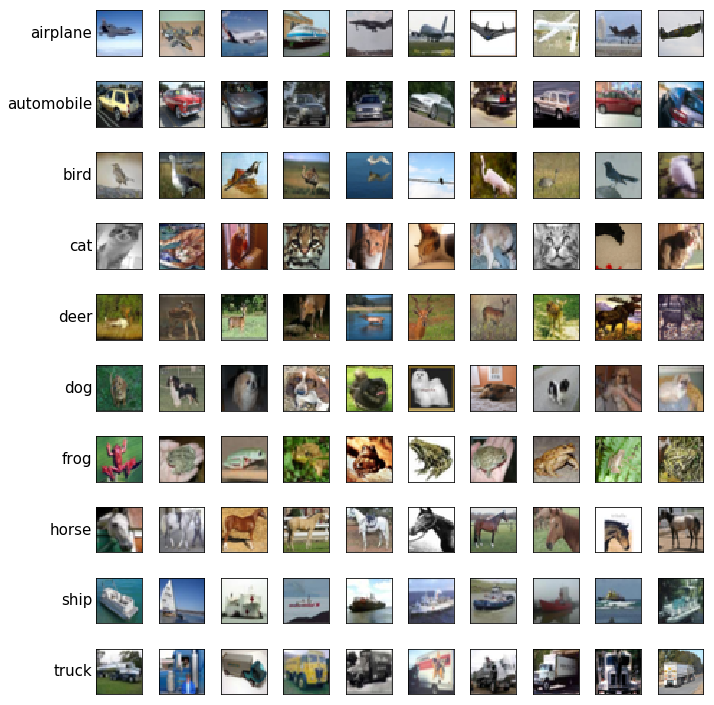

In [11]:
show_random_images_by_class(x_cifar, y_cifar, CIFAR_LABELS, n_classes)